In [37]:
from DTW import *
from tabata.opset import Opset
from HMM import *
%reload_ext autoreload

In [14]:
input_file = "../Data/normalized/AFL1EB_normalized.h5"
ds = Opset(input_file)

reference = ds[11]
target = ds[44]
reference, ref_obs = preprocess_data(reference)
target, tgt_obs = preprocess_data(target)


# Avec HMM

In [15]:
# Définir les phases
states = ["0", "1", "2", "3", "4"]
n_states = len(states)

model = create_hmm_model(n_states)
model.fit(ref_obs)
reference = detect_phases(reference, model, states)
target = detect_phases(target, model, states)
# Visualisation des phases détectées
plot_phases_on_flight(reference, phases_col="Phase", value_col="ALT[m]", title="Phases sur la Référence")
plot_phases_on_flight(target, phases_col="Phase", value_col="ALT[m]", title="Phases sur la Cible")



C:\Users\ruber\OneDrive\Bureau\MDD\HMM.py:94: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Alignement des phases : 

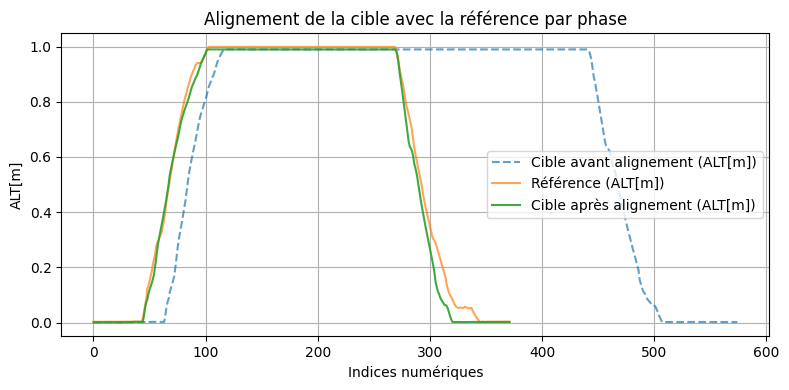

In [17]:
# Aligner les données de la cible sur celles de la référence
aligned_data = align_by_phase(reference, target, states)
# Visualisation de l'alignement
plot_alignment(reference, target, aligned_data)


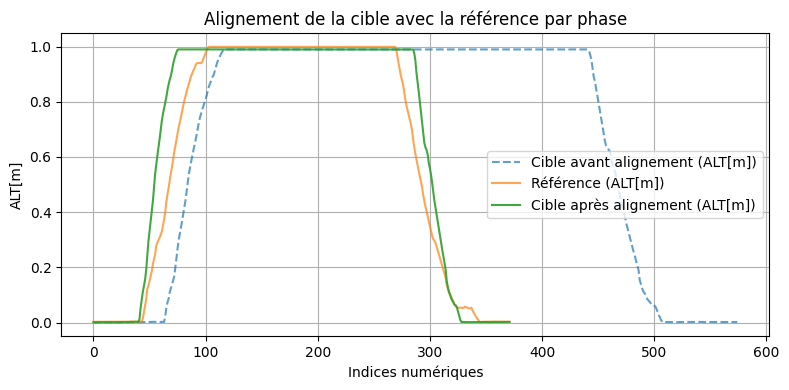

In [18]:
aligned_data_no_phase = align_without_phases(reference,target)
plot_alignment(reference, target, aligned_data_no_phase)

# Avec DTW

c:\Users\ruber\OneDrive\Bureau\MDD\venv\Lib\site-packages\dtaidistance\dtw.py:471: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Distance DTW : 0.1421798360960631


C:\Users\ruber\OneDrive\Bureau\MDD\DTW.py:56: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\ruber\OneDrive\Bureau\MDD\DTW.py:56: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



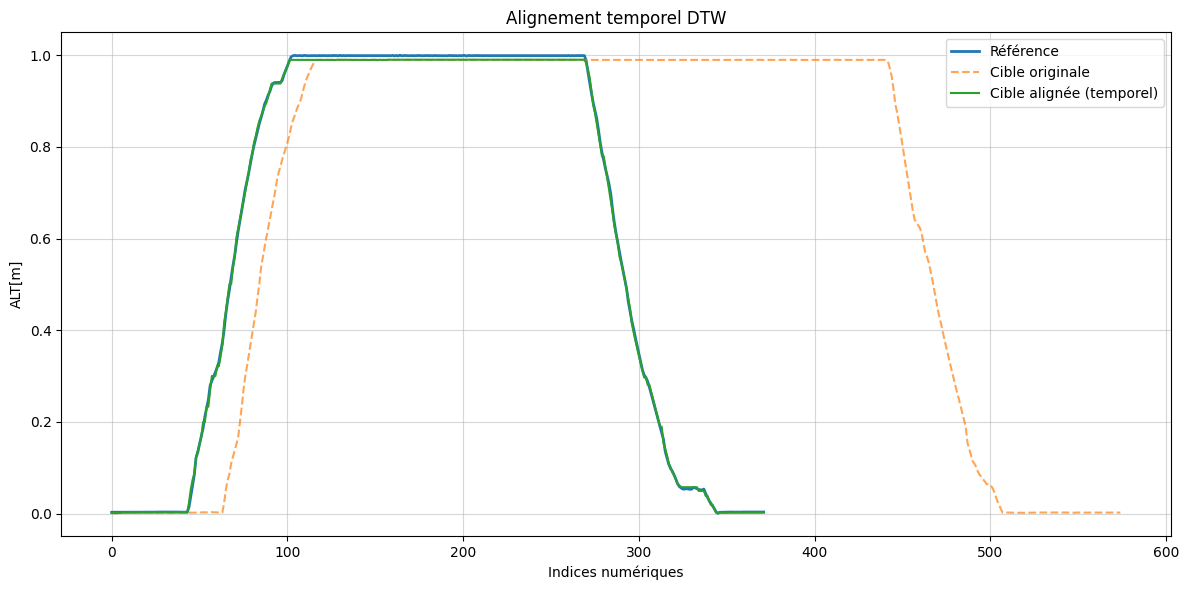

In [57]:
distance, path = calculate_dtw(reference, target, value_col="ALT[m]")
print(f"Distance DTW : {distance}")
aligned_target_DTW = align_with_dtw(reference, target, path)
plot_dtw_alignment(reference, target, aligned_target_DTW, value_col="ALT[m]")


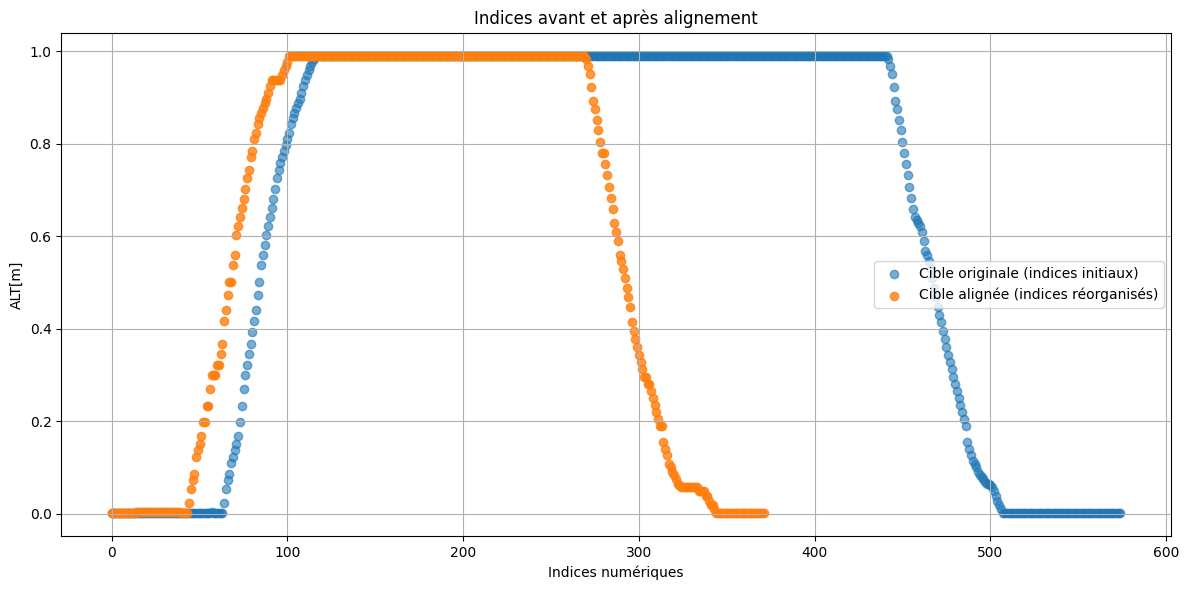

In [32]:
value_col="ALT[m]"
plt.figure(figsize=(12, 6))

# Série avant alignement
plt.scatter(
    np.arange(len(target)), 
    target[value_col], 
    label="Cible originale (indices initiaux)", alpha=0.6
)

# Série après alignement
plt.scatter(
    np.arange(len(aligned_target_DTW)), 
    aligned_target_DTW[value_col], 
    label="Cible alignée (indices réorganisés)", alpha=0.8
)

plt.legend()
plt.xlabel("Indices numériques")
plt.ylabel(value_col)
plt.title("Indices avant et après alignement")
plt.grid()
plt.tight_layout()
plt.show()


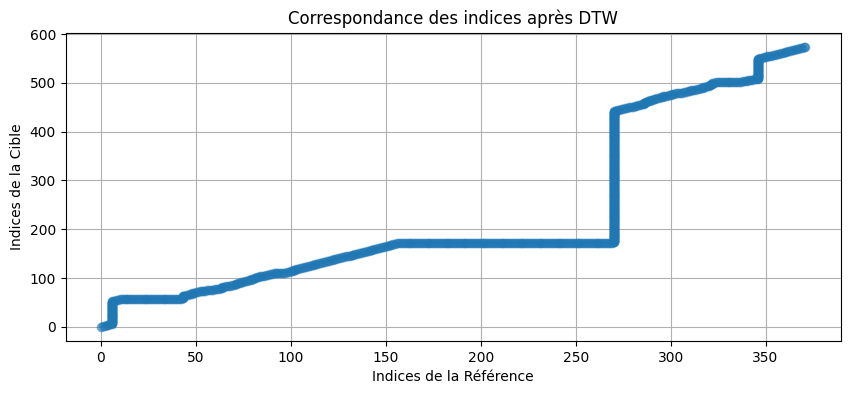

In [45]:
# Affichage des correspondances entre indices
path_array = np.array(path)

# Comparer les indices alignés
plt.figure(figsize=(10, 4))
plt.plot(path_array[:, 0], path_array[:, 1], marker="o", linestyle="-", alpha=0.5)
plt.xlabel("Indices de la Référence")
plt.ylabel("Indices de la Cible")
plt.title("Correspondance des indices après DTW")
plt.grid()
plt.show()

# Calcul d'erreurs

In [53]:
sync_error_no_phase = calculate_sync_error(reference, aligned_data_no_phase, value_col="ALT[m]", metric="RMSE")
print(f"Erreur de synchronisation sans phase (RMSE) : {sync_error_no_phase}")
sync_error_with_phase = calculate_sync_error(reference, aligned_data, value_col="ALT[m]", metric="RMSE")
print(f"Erreur de synchronisation HMM (RMSE) : {sync_error_with_phase}")
sync_error_DTW = calculate_sync_error(reference, aligned_target_DTW, value_col="ALT[m]", metric="RMSE")
print(f"Erreur de synchronisation DTW (RMSE) : {sync_error_DTW}")


Erreur de synchronisation sans phase (RMSE) : 0.11921706486881559
Erreur de synchronisation avec phase (RMSE) : 0.03646819266258864
Erreur de synchronisation avec phase (RMSE) : 0.007057978648945178
